In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import least_squares
from matplotlib.pyplot import figure

In [ ]:
L0 = 643.847e-9 #inital wavelength

d = 4e-3 #spacing

n = 1.457 #Etalon 

f = 150e-3 #focal length 

n2 = np.square(n) #n squared

In [ ]:
kl = list(range(18090,18104)) #List of K values


k = np.array(kl) #K values as array
print(k)


[18090 18091 18092 18093 18094 18095 18096 18097 18098 18099 18100 18101
 18102 18103]


In [ ]:
a = np.arcsin(np.sqrt(n2 - (np.square((k*L0)/(2*d))))) #OPD equation (Etalon equation)
print(a)

rk = a*f #radi of fringes
print(rk)



[0.05666085 0.05454922 0.05235272 0.05006017 0.04765771 0.0451278
 0.04244764 0.03958675 0.03650264 0.03313304 0.02937989 0.02507153
 0.01984965 0.01262772]
[0.00849913 0.00818238 0.00785291 0.00750903 0.00714866 0.00676917
 0.00636715 0.00593801 0.0054754  0.00496996 0.00440698 0.00376073
 0.00297745 0.00189416]


In [ ]:
rk2 = np.array([1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2])*1e-3 #new fringe values
print(rk2)



[0.0015 0.0016 0.0017 0.0018 0.0019 0.002  0.0021 0.0022]


In [ ]:
a2 = rk2/f #new angles, (rK = fa)
print(a2)
fx = np.sin(a2) #sin of new angles

L = (2*d/18103)*np.sqrt(n2-(fx**2)) #rearranged OPD equation

print(L)



[0.01       0.01066667 0.01133333 0.012      0.01266667 0.01333333
 0.014      0.01466667]
[6.43856017e-07 6.43853927e-07 6.43851703e-07 6.43849344e-07
 6.43846851e-07 6.43844222e-07 6.43841459e-07 6.43838561e-07]


In [ ]:
DL = L - L0 #Delta Lamba values 

DLL0 = (DL/L0) #Delta lamba over Lamba 0

print(DLL0)




[ 1.40043179e-05  1.07592307e-05  7.30480418e-06  3.64104238e-06
 -2.32050525e-07 -4.31447007e-06 -8.60621157e-06 -1.31072701e-05]


In [ ]:
DLA = np.array((L/L0) -1) #Delta lamab over lamba 0 calculated independent of k and d

DLA2 = (DLA)

print(DLA2)




[ 1.40043179e-05  1.07592307e-05  7.30480418e-06  3.64104238e-06
 -2.32050525e-07 -4.31447007e-06 -8.60621157e-06 -1.31072701e-05]


In [ ]:
#a values for Transverse waves

Ti = np.array([119, 127.5, 122, 122, 121.5, 123.5, 127, 121, 121.5, 122, 120.5])

Tm = np.array([135, 140, 140.5, 140, 140, 140, 140, 140, 140, 140.5, 140])

To = np.array([148, 155, 156, 155, 155.5, 156, 155.5, 156.5, 157.5, 156.5, 158])

#r values

Tri = Ti*14e-6 

Trm = Tm*14e-6

Tro = To*14e-6


#a values

#a = r/f

ai = Tri/f

am = Trm/f

ao = Tro/f

print(ai)
print(am)
print(ao)


[0.01110667 0.0119     0.01138667 0.01138667 0.01134    0.01152667
 0.01185333 0.01129333 0.01134    0.01138667 0.01124667]
[0.0126     0.01306667 0.01311333 0.01306667 0.01306667 0.01306667
 0.01306667 0.01306667 0.01306667 0.01311333 0.01306667]
[0.01381333 0.01446667 0.01456    0.01446667 0.01451333 0.01456
 0.01451333 0.01460667 0.0147     0.01460667 0.01474667]


In [ ]:
#Delta lamba / Lamba 0 for inside

DLL0i = (np.sqrt(n2 - (np.sin(ai))**2))/(np.sqrt(n2 - (np.sin(am))**2)) -1

print(DLL0i)

#Delta lamba / Lamba 0 for outside


DLL0o = (np.sqrt(n2 - (np.sin(ao))**2))/(np.sqrt(n2 - (np.sin(am))**2)) -1

print(DLL0o)

[8.33811691e-06 6.86035319e-06 9.96356691e-06 9.67581578e-06
 9.92561249e-06 8.92027120e-06 7.12143300e-06 1.01743835e-05
 9.92561249e-06 9.96356691e-06 1.04221287e-05]
[-7.54810188e-06 -9.07861532e-06 -9.42893175e-06 -9.07861532e-06
 -9.39713349e-06 -9.71667729e-06 -9.39713349e-06 -1.00372467e-05
 -1.06814625e-05 -9.74950128e-06 -1.10051089e-05]


In [ ]:
#Delta E

h = 6.63e-34

c = 3e8

DEi = -((h*c)/(643.847e-9))*DLL0i

print(DEi)

DEo = -((h*c)/(643.847e-9))*DLL0o 

print(DEo)

[-2.57584714e-24 -2.11932998e-24 -3.07798818e-24 -2.98909486e-24
 -3.06626314e-24 -2.75568876e-24 -2.19998389e-24 -3.14311454e-24
 -3.06626314e-24 -3.07798818e-24 -3.21964907e-24]
[2.33179228e-24 2.80460511e-24 2.91282638e-24 2.80460511e-24
 2.90300312e-24 3.00171798e-24 2.90300312e-24 3.10074967e-24
 3.29976360e-24 3.01185810e-24 3.39974583e-24]


In [ ]:
#B

A = np.array([6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0])

B = (-0.9421*(A**3) + 6.1937*(A**2) + 86.975*(A) + 7.3701)*1e-3

print(B)


[0.5486997  0.56017212 0.57073819 0.58035269 0.5889704  0.5965461
 0.60303457 0.60839058 0.61256892 0.61552437 0.6172117 ]


In [ ]:
#error on B

Berr = 7*1e-3

print(Berr)



0.007


In [ ]:
#x and y data outer

xData = DEo

yData = B

In [ ]:
#error on radi for outside

ererr = 14e-6/2 

focalerr = 1e-3

aoerr = np.sqrt((ererr/Tro)**2 + (focalerr/f)**2) * ao

a0err = np.sqrt((ererr/Trm)**2 + (focalerr/f)**2) * am


#error on outside fringes

dfao = -(np.cos(ao) * np.sin(ao)) / (n2 * np.sqrt(1 - (np.sin(ao))**2/n2))



dfam = (np.cos(am) * np.sin(am)) / (n2 * (1 - (np.sin(am))**2/n2)**3/2)


dfao2 = dfao / np.sqrt(1 - (np.sin(am)/n)**2) * aoerr

dfam2 = dfam * np.sqrt(1 - ((np.sin(ao)/n)**2)) * a0err



ferr2 = np.sqrt((dfao2**2) + (dfam2**2))

Eferr = -(h*c*ferr2)/643.847e-9

print(Eferr)


[-4.08974229e-25 -4.38338007e-25 -4.41747839e-25 -4.38338007e-25
 -4.39018087e-25 -4.39703232e-25 -4.39018087e-25 -4.40393457e-25
 -4.41789202e-25 -4.42434873e-25 -4.42494749e-25]


In [ ]:
#x and y data inner

xData2 = DEi

yData2 = B

In [ ]:
#error on radi for inside

aierr = np.sqrt((ererr/Tri)**2 + (focalerr/f)**2) * ai

a0err = np.sqrt((ererr/Trm)**2 + (focalerr/f)**2) * am


#error on inside fringes

dfai = -(np.cos(ai) * np.sin(ai)) / (n2 * np.sqrt(1 - (np.sin(ai))**2/n2))



dfam = (np.cos(am) * np.sin(am)) / (n2 * (1 - (np.sin(am))**2/n2)**3/2)


dfai2 = dfai / np.sqrt(1 - (np.sin(am)/n)**2) * aierr

dfam2 = dfam * np.sqrt(1 - ((np.sin(ai)/n)**2)) * a0err



ferr2 = np.sqrt((dfai2**2) + (dfam2**2))

Eferr2 = -(h*c*ferr2)/643.847e-9

print(Eferr2)

[-3.79752219e-25 -4.08261312e-25 -4.06051024e-25 -4.03825657e-25
 -4.03445853e-25 -4.04988166e-25 -4.07838151e-25 -4.03069863e-25
 -4.03445853e-25 -4.06051024e-25 -4.02697665e-25]


In [ ]:
#Errors on x and y data for outside

xerr = Berr

yerr = Eferr

In [ ]:
#Erros on x and y data for inside 

xerr = Berr

yerr2 = Eferr2

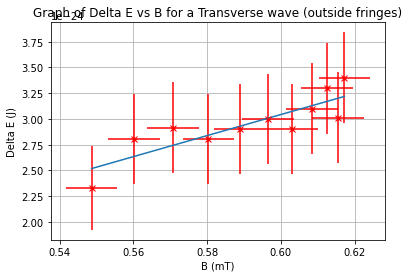

chi squared value = 0.12284696635051574


LinregressResult(slope=1.0222959231487883e-23, intercept=-3.090740972255894e-24, rvalue=0.8561722191494187, pvalue=0.000768752965454093, stderr=2.056481307560916e-24)

In [ ]:
#Delta E vs B outer

plt.plot(yData, xData, color = 'r', linestyle = '', marker = '.')
m, b = np.polyfit(yData, xData, 1)
plt.plot(yData, m*yData + b)
plt.errorbar(yData, xData, yerr, xerr, fmt='rx')
plt.title("Graph of Delta E vs B for a Transverse wave (outside fringes)")
plt.ylabel("Delta E (J)")
plt.xlabel("B (mT)")
plt.grid()
plt.show()


#Chi squared for Transvere with outside fringes

nPoints = len(yData)
nPars = 2

yDataE = (1.0222959231487883e-23 * B) + (-3.090740972255894e-24)

chi = np.sum(((xData - yDataE)**2)/(yerr**2))

NDF = nPoints - nPars
chisqndf = chi/NDF

print("chi squared value =",chisqndf)

linregress(yData, xData)


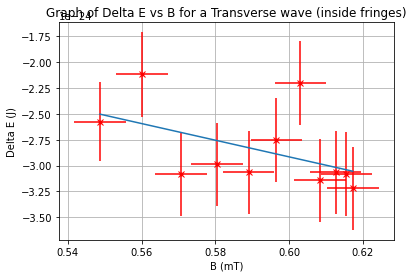

chi squared value = 0.7538982682249765


LinregressResult(slope=-8.052931181419107e-24, intercept=1.915512133182535e-24, rvalue=-0.49095812703155317, pvalue=0.12516092081165567, stderr=4.763188370194843e-24)

In [ ]:
#Delta E vs B inner

plt.plot(yData2, xData2, color = 'r', linestyle = '', marker = '.')
m, b = np.polyfit(yData2, xData2, 1)
plt.plot(yData2, m*yData2 + b)
plt.errorbar(yData2, xData2, yerr2, xerr, fmt='rx')
plt.title("Graph of Delta E vs B for a Transverse wave (inside fringes)")
plt.ylabel("Delta E (J)")
plt.xlabel("B (mT)")
plt.grid()
plt.show()

#Chi squared for Transvere with inside fringes

nPoints = len(yData2)
nPars = 2

yDataE2 = (-8.052931181419107e-24 * B) + (1.915512133182535e-24)

chi = np.sum(((xData2 - yDataE2)**2)/(yerr2**2))

NDF = nPoints - nPars
chisqndf = chi/NDF

print("chi squared value =",chisqndf)


linregress(yData2, xData2)


In [ ]:
#a values for longatudinal waves

Li = np.array([114, 113.5, 113.5, 111.5, 113.5, 111, 113.5, 110, 113, 111, 111.5])

Lm = np.array([131.5, 133, 129.5, 132, 127.5, 133.5, 133.5, 134.5, 133.5, 133, 135.5])

Lo = np.array([150, 150, 151, 151.5, 151.5, 152, 152.5, 153, 153, 153, 153])

#r values

Lri = Li*14e-6 

Lrm = Lm*14e-6

Lro = Lo*14e-6


#a values

#a = r/f

ai2 = Lri/f

am2 = Lrm/f

ao2 = Lro/f

print(ai2)
print(am2)
print(ao2)


[0.01064    0.01059333 0.01059333 0.01040667 0.01059333 0.01036
 0.01059333 0.01026667 0.01054667 0.01036    0.01040667]
[0.01227333 0.01241333 0.01208667 0.01232    0.0119     0.01246
 0.01246    0.01255333 0.01246    0.01241333 0.01264667]
[0.014      0.014      0.01409333 0.01414    0.01414    0.01418667
 0.01423333 0.01428    0.01428    0.01428    0.01428   ]


In [ ]:
#Delta lamba / Lamba 0 for inside

DLL0i2 = (np.sqrt(n2 - (np.sin(ai2))**2))/(np.sqrt(n2 - (np.sin(am2))**2)) -1

print(DLL0i2)

#Delta lamba / Lamba 0 for outside


DLL0o2 = (np.sqrt(n2 - (np.sin(ao2))**2))/(np.sqrt(n2 - (np.sin(am2))**2)) -1

print(DLL0o2)

[8.81464255e-06 9.86204133e-06 7.97703450e-06 1.02416153e-05
 6.92245679e-06 1.12869638e-05 1.01354315e-05 1.22902552e-05
 1.03677895e-05 1.10135733e-05 1.21625292e-05]
[-1.06845820e-05 -9.87058280e-06 -1.23730979e-05 -1.13421327e-05
 -1.37379650e-05 -1.08363943e-05 -1.11487574e-05 -1.09123002e-05
 -1.14621462e-05 -1.17355305e-05 -1.03583508e-05]


In [ ]:
#Delta E 

DEi2 = -((h*c)/(643.847e-9))*DLL0i2

print(DEi2)

DEo2 = -((h*c)/(643.847e-9))*DLL0o2 

print(DEo2)





[-2.72305750e-24 -3.04662446e-24 -2.46430000e-24 -3.16388408e-24
 -2.13851529e-24 -3.48681768e-24 -3.13108133e-24 -3.79675878e-24
 -3.20286237e-24 -3.40236071e-24 -3.75730112e-24]
[3.30072729e-24 3.04926313e-24 3.82235092e-24 3.50386070e-24
 4.24399158e-24 3.34762578e-24 3.44412237e-24 3.37107498e-24
 3.54093579e-24 3.62539084e-24 3.19994653e-24]


In [ ]:
#Longaudinal outside fringes

xData3 = DEo2

yData3 = B

In [ ]:
#Errors on Longatudinal (outside)

aoerr2 = np.sqrt((ererr/Lro)**2 + (focalerr/f)**2) * ao2

a0err2 = np.sqrt((ererr/Lrm)**2 + (focalerr/f)**2) * am2


#error on outside fringes

dfao2 = -(np.cos(ao2) * np.sin(ao2)) / (n2 * np.sqrt(1 - (np.sin(ao2))**2/n2))



dfam2 = (np.cos(am2) * np.sin(am2)) / (n2 * (1 - (np.sin(am2))**2/n2)**3/2)


dfao3 = dfao2 / np.sqrt(1 - (np.sin(am2)/n)**2) * aoerr2

dfam3 = dfam2 * np.sqrt(1 - ((np.sin(ao2)/n)**2)) * a0err2



ferr3 = np.sqrt((dfao3**2) + (dfam3**2))

Eferr3 = -(h*c*ferr3)/643.847e-9

print(Eferr3)

yerr3 = Eferr3

[-3.98023025e-25 -4.03765018e-25 -3.91914063e-25 -4.01983150e-25
 -3.85323607e-25 -4.08413805e-25 -4.09105042e-25 -4.13664612e-25
 -4.09801435e-25 -4.07885776e-25 -4.17570203e-25]


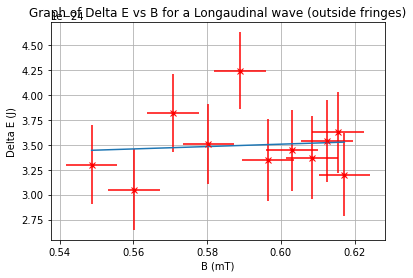

chi squared value = 0.7478623865285237


LinregressResult(slope=1.1967226863414342e-24, intercept=2.7879953157870643e-24, rvalue=0.08658713992204575, pvalue=0.8001604251615426, stderr=4.589704403174192e-24)

In [ ]:
#Delta E vs B for Longatduinal outside

plt.plot(yData3, xData3, color = 'r', linestyle = '', marker = '.')
m, b = np.polyfit(yData3, xData3, 1)
plt.plot(yData3, m*yData3 + b)
plt.errorbar(yData3, xData3, yerr3, xerr, fmt='rx')
plt.title("Graph of Delta E vs B for a Longaudinal wave (outside fringes)")
plt.ylabel("Delta E (J)")
plt.xlabel("B (mT)")
plt.grid()
plt.show()


#Chi squared for Longatudinal with outside fringes

nPoints = len(yData3)
nPars = 2

yDataE3 = (1.1967226863414342e-24 * B) + (2.7879953157870643e-24)

chi = np.sum(((xData3 - yDataE3)**2)/(yerr3**2))

NDF = nPoints - nPars
chisqndf = chi/NDF

print("chi squared value =",chisqndf)

linregress(yData3, xData3)


In [ ]:
#Longaudinal inside fringes

xData4 = DEi2

yData4 = B

In [ ]:
#Errors on Longatudinal (inside)

aierr2 = np.sqrt((ererr/Lri)**2 + (focalerr/f)**2) * ai2

a0err2 = np.sqrt((ererr/Lrm)**2 + (focalerr/f)**2) * am2


#error on outside fringes

dfai2 = -(np.cos(ai2) * np.sin(ai2)) / (n2 * np.sqrt(1 - (np.sin(ai2))**2/n2))



dfam2 = (np.cos(am2) * np.sin(am2)) / (n2 * (1 - (np.sin(am2))**2/n2)**3/2)


dfai3 = dfai2 / np.sqrt(1 - (np.sin(am2)/n)**2) * aierr2

dfam3 = dfam2 * np.sqrt(1 - ((np.sin(ai2)/n)**2)) * a0err2



ferr3 = np.sqrt((dfai3**2) + (dfam3**2))

Eferr4 = -(h*c*ferr3)/643.847e-9

print(Eferr4)

yerr4 = Eferr4

[-3.61272873e-25 -3.67241367e-25 -3.52621464e-25 -3.61644865e-25
 -3.44477192e-25 -3.67691838e-25 -3.69367949e-25 -3.71354931e-25
 -3.69025445e-25 -3.65555501e-25 -3.76651651e-25]


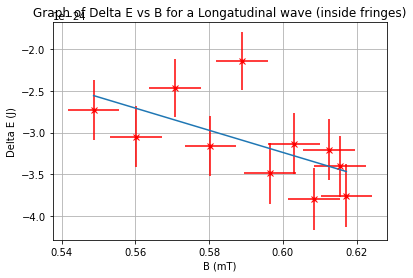

chi squared value = 1.4810467665916596


LinregressResult(slope=-1.3313984911560366e-23, intercept=4.750613973848489e-24, rvalue=-0.6072508158089263, pvalue=0.04754658171343594, stderr=5.8065500260156384e-24)

In [ ]:
#Delta E vs B for Longatduinal inside

plt.plot(yData4, xData4, color = 'r', linestyle = '', marker = '.')
m, b = np.polyfit(yData4, xData4, 1)
plt.plot(yData4, m*yData4 + b)
plt.errorbar(yData4, xData4, yerr4, xerr, fmt='rx')
plt.title("Graph of Delta E vs B for a Longatudinal wave (inside fringes)")
plt.ylabel("Delta E (J)")
plt.xlabel("B (mT)")
plt.grid()
plt.show()

#Chi squared for Longatudinal with inside fringes

nPoints = len(yData4)
nPars = 2

yDataE4 = (-1.331398491160366e-23 * B) + (4.750613973848489e-24)

chi = np.sum(((xData4 - yDataE4)**2)/(yerr4**2))

NDF = nPoints - nPars
chisqndf = chi/NDF

print("chi squared value =",chisqndf)

linregress(yData4, xData4)
